# Import

In [3]:
import pandas as pd 
import datetime as dt
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Exercice 1 

## 1.1

In [4]:
df = pd.read_csv("./NuclearPowerAccidents2016.csv")
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True) #conversion de la date
df = df[df['Date'] < pd.to_datetime(dt.date(1979, 3, 28))]
df_cost = df['Cost (millions 2013US$)'].dropna()
df_cost.reset_index(inplace = True, drop = True)
df_cost

0     8189.0
1     4400.0
2     3500.0
3     2900.0
4     2500.0
5     1964.5
6     1900.0
7     1733.4
8     1500.0
9     1330.0
10    1300.0
11    1100.0
12    1100.0
13     990.0
14     800.0
15     793.9
16     788.4
17     541.4
18     511.5
19     425.2
20     277.1
21     180.0
22     150.0
23     100.0
24     100.0
25      99.5
26      98.0
27      89.9
28      87.7
29      84.5
30      77.0
31      60.1
32      52.4
33      38.0
34      37.5
35      25.7
36      25.7
37      17.1
38      16.1
39      15.0
40      13.9
41      11.8
42      11.4
43       6.1
44       4.4
45       1.2
46       1.1
47       0.0
48       0.0
49       0.0
50       0.0
51       0.0
52       0.0
53       0.0
54       0.0
Name: Cost (millions 2013US$), dtype: float64

## 1.2.a

Soit $ X_{1} \sim N(\mu,\sigma^2)$ et $ X_{2} = \frac{X_{1} - \mu}{\sigma} \sim N(0,1)$

On note $F_{1}$ la fonction de répartition de $X_{1}$ et $F_{2}$ celle de de $X_{2}$

On a : $\forall p \in [0,1], F_{1}(x) = P(X_{1} < x) = P(\mu + \sqrt{\sigma^{2}} X_{2} < x) = P(X_{2} < \frac{x - \mu}{\sqrt{\sigma^{2}}} ) = F_{2}( \frac{x- \mu}{\sqrt{\sigma^{2}}}) = p$

Donc $F_{1}^{-1}(p)= \mu + \sqrt{\sigma^{2}}F_{2}^{-1}(p)\;$ 

Donc $F^{-1}(p,\mu,\sigma^2) = \mu + \sqrt{\sigma^{2}}F^{-1}(p,0,1) $ 

## 1.2.b

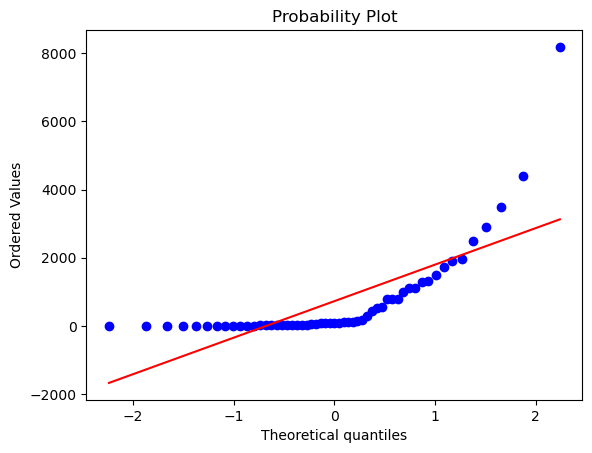

In [4]:
stats.probplot(df_cost, dist="norm", plot=plt)
plt.show()

## 1.3.a

Soit $ X_{1} \sim e(\lambda)$ et $ X_{2} \sim e(1)$

On note $F_{1}$ la fonction de répartition de $X_{1}$ et $F_{2}$ celle de $X_{2}$

On a $ \forall p \in ]0,1[ , F_{1}(x) = P(X_{1} < x) = P(\frac{X_{2}}{\lambda} < x) = P(X_{2} < \lambda x ) = F_{2}(\lambda x) = p$  $ $

Donc $F_{1}^{-1}(p)= \frac{F_{2}^{-1}(p)}\lambda\;$

Donc $F^{-1}(p,\lambda) = \frac{F^{-1}(p,1)}{\lambda} $ 

## 1.3.b

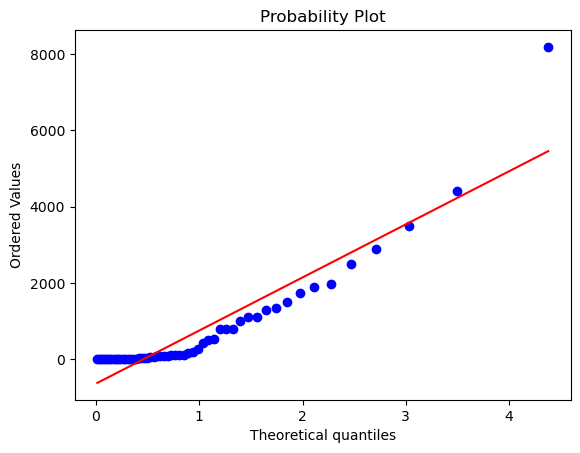

In [5]:
stats.probplot(df_cost, dist="expon", plot=plt)
plt.show()

## 1.4

# Exercice 2

## 1

$L(x_{1},..,x_{n},\lambda) = f(x_{1},..,x_{n},\lambda)= \prod_{i=1}^{n}\lambda e^{-\lambda x} = \lambda^{n} e^{-\lambda \sum_{i}^{n}x_{i}} $

$ log(L(x_{1},..,x_{n},\lambda)) = n log(\lambda) -\lambda \sum_{i}^{n}x_{i} $

$ \frac {\partial \log(L)}{\partial \lambda} = \frac {n}{\lambda}  -\sum_{i=1}^{n}x_{i} $

On veut $ \frac {\partial \log(L)}{\partial \lambda} = 0 \,$ on choisit donc $\lambda = \frac{n}{\sum_{i=1}^{n}x_{i}}$ 

On a bien $ \frac{\partial^2 \log(L) } {\partial^2 \lambda}= - \frac{n}{\lambda^2} < 0  $ 

Ainsi, l'estimateur de maximum de vraisemblance est $ \widehat{\lambda} = \frac{n}{\sum_{i=1}^{n}x_{i}} $

## 2 

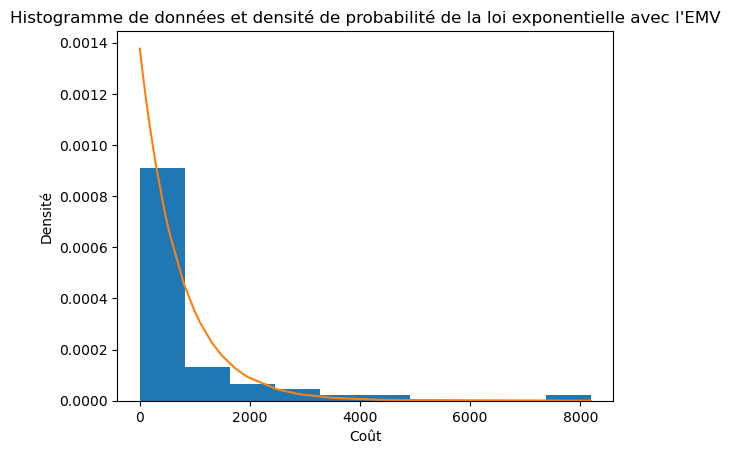

In [6]:
plt.hist(df_cost,density=True)
emv = len(df_cost)/sum(df_cost) #n/sum(x_i)
plt.title("Histogramme de données et densité de probabilité de la loi exponentielle avec l'EMV")
plt.xlabel("Coût")
plt.ylabel("Densité")
plt.plot(df_cost, stats.expon.pdf(df_cost,scale=1/emv))
plt.show()

## 3

On a $g_{1}(\lambda)= \frac{1}{\lambda}   \; et  \;   T_{1}(X)= \frac {1}{n}\sum_{i=1}^{n}X_{i}$

$\mathbb{E}(T_{1}(X) - g_{1}(\lambda)) =  \frac{1}{n} \sum_{i=1}^{n}\mathbb{E}[{X}_{i}] - \frac{1}{\lambda} = \frac{n}{n\lambda} - \frac{1}{\lambda} = 0$, donc $T_{1} \;$ est sans biais.



De plus, on a $g_{1}'(\lambda)^{2} = \frac{1}{\lambda^{4}}$ 

On pose $ I_1(\lambda) $ l'information de fisher pour une seule observation, on a $I(\lambda)=nI_1(\lambda) $

Notre modele est régulier, on a donc $I_{1}(\lambda) = - \mathbb{E}(\frac {\partial^{2} \log f_{\lambda}(x)}{\partial \lambda^{2}} ) $


$\log f_{\lambda}(x)= \log ( \lambda \exp (-\lambda x))= \log(\lambda) -\lambda x $

$ \frac {\partial \log f_{\lambda}(x)}{\partial \lambda} = \frac {\partial\log(\lambda) -\lambda x}{\partial \lambda} = \frac{1}{\lambda} - x $
 
$\frac {\partial^{2} \log f_{\lambda}(x)}{\partial \lambda^{2}} = \frac {\partial^{2}\log(\lambda) -\lambda x}{\partial \lambda^{2}} = \frac{-1}{\lambda^{2}}  \rightarrow  I_{1}(\lambda)= \frac{1}{\lambda^{2}} $

On obtient donc $I(\lambda)=\frac{n}{\lambda^{2}}$

Ainsi, on a la borne de Cramer Rao $ \frac{g_{1}'(\lambda)^{2}}{I(\lambda)} = \frac{1}{n\lambda^{2}} $

Et $Var(T_{1}(X)) =  \frac{Var(T_1(X_1))}{n} = \frac{1}{n\lambda^{2}} = \frac{g_{1}'(\lambda)^{2}}{I(\lambda)}$

$T_{1}$ est donc un estimateur efficace de $g_{1}(\lambda)$

## 4

In [9]:
g1 = sum(df_cost)/len(df_cost)
print("g1 vaut %f." % g1)

g1 vaut 726.336364.


## 5

$ \tilde {T_{1 , \eta} }(X) = \eta T_{1}(X)$


$ R( \lambda , T_{1})= Var_{\lambda}( T(X)) = \frac {1}{n\lambda^{2}}$  (estimateur efficace sans biais)

$R(\lambda,\tilde {T_{1 , \eta} }(X)) = biais(\lambda,\tilde {T_{1 , \eta} }(X))^{2} + Var(\tilde  {T_{1 , \eta} }(X)) = (\frac{\eta -1}{\lambda})^{2} + \frac{\eta^{2}}{n\lambda^{2}}$

On cherche  $\;\eta\;$ tel que :
$R( \lambda,{T_{1} }(X)) - R(\lambda,\tilde {T_{1 , \eta} }(X)) = \frac{1}{n\lambda^{2}} -  (\frac{\eta -1}{\lambda})^{2} - \frac{\eta^{2}}{n\lambda^{2}} > 0$

On a d'une part $ \frac{1+\eta}{1-\eta} > n \Leftrightarrow \eta<1$

Et d'autre part $ \eta > \frac{n-1}{n+1} $

Donc $R( \lambda,{T_{1} }(X)) > R(\lambda,\tilde {T_{1 , \eta} }(X))\;$ si $\;\eta \in ]\frac{n-1}{n+1},1[ $

Ce résultat n'est pas en contradiction avec la question précédente car $\tilde {T_{1 , \eta} }(X)$ est biaisé

## 6

La médiane est $\;\frac{log(2)}{\lambda}$ ( loi exponentielle de paramètre $\lambda \;$)

Pour que $\;\tilde {T_{1 , \eta} }(X)\;$ soit estimateur sans biais de la médiane, il faut que $ \mathbb{E}(\eta T_{1}(X))-\frac{log(2)}{\lambda}) = 0$, donc que $\frac{\eta}{\lambda}- \frac{log(2)}{\lambda}=0 $

Ainsi, $\eta = log(2)$

In [8]:
T1_eta=np.log(2)*g1
print("L’estimateur de la mediane vaut %f." % T1_eta)
median=np.median(df_cost)
print("La médiane empirique vaut %f." % median)

L’estimateur de la mediane vaut 503.458003.
La médiane empirique vaut 89.900000.


## 7

Les risques quadratiques pour $ T_1$ et $ \widetilde{{T_1}} $ comme estimateurs de $g_{1}(\lambda)$

$R(\lambda,T_{1}) = \frac{1}{n\lambda^{2}}$

$R(\lambda, \tilde {T_{1 , \eta} }) = (\frac{\eta -1}{\lambda})^{2} + \frac{\eta^{2}}{n\lambda^{2}}  $

Ici, n = 55, donc ,$\frac {n-1}{n+1} = \frac{54}{56}= 0.96 $ et $\eta = ln(2) = 0.69 $  donc  $\eta < \frac {n-1}{n+1}$.

Selon la question 5, on a donc $ R( \widetilde{{T_1}} ,\lambda) > R(T_{1}, \lambda)$ 

# Exercice 3

## 1

Hypothèse nulle $H_{0}(\lambda) : \frac{1}{\lambda} < 1000,  \lambda_{0} > 0.001 \;$

Hypothèse alternative $H_{1}(\lambda) : \frac{1}{\lambda} \geq 1000, \lambda_{1} \leq 0.001$ 

## 2

D'abord, on cherche Z le rapport de vraisemblance, en notant respectivement $f_1, f_0$ les fonctions densité du vecteur $(X_1, ..., X_n)$, où les $X_i$ suivent une loi exponentielle de paramètre $\lambda_1, \lambda_0$ :

$\forall j \in$ {0, 1},
$f_j (x) = \Pi _{i=1}^n \lambda_j e^{-\lambda_j x_i} = \lambda_j ^n exp(-\lambda_j \sum _{i=1}^n x_i ) = \lambda_j ^n exp(-\lambda_j S(x) ) $ 

Donc $Z(x) = \frac {f_1(x)}{f_0(x)} = (\frac {\lambda_1}{\lambda_0}) ^n exp(-(\lambda_1 - \lambda_0) S(x)) $

Avec $ S(X) = \sum_{i=1}^{n} X_i \sim\Gamma(n, \lambda) $ (somme de lois gamma i.i.d. de paramètres $(1, \lambda)$)

Ensuite, on cherche $t_\alpha$ tel que $ P_{\lambda_0}(Z(X) > t_\alpha) = \alpha$ $\newline$
On a $ Z(X) > t_\alpha \Leftrightarrow S(X) > {t_\alpha} ' $, car $Z$ est une fonction croissante de $S$

Ainsi, $ P_{\lambda_0} (S(X) > t_\alpha') = \alpha $ $ \Leftrightarrow P_{\lambda_0} (S(X) < t_\alpha') = 1-\alpha $ $ \Leftrightarrow  t_\alpha' = q_{1-\alpha}^{\Gamma(n, \lambda)} $

Le test le plus puissant est donc $\forall X \in (R^{+})^n, \delta (X) = \mathbb{1}_{S(X) > t_\alpha'} (X) \, \, \, $


## 3

In [13]:
k_alpha = stats.gamma.ppf(0.95, len(df_cost), scale = 1000)
print("La somme des observations vaut", np.sum(df_cost))
print("K_alpha vaut %f." % k_alpha)

La somme des observations vaut 39948.5
K_alpha vaut 67740.088964.
La p-valeur vaut 0.986283.


On obtient alors $S(X) < t_{\alpha}$ dans notre cas, donc $\delta(X)=0.$

Ainsi, l'hypothèse H_0 est validé, le coût moyen d'accident est inférieur à 1 milliard de dollars

In [5]:
p_value = 1 - stats.gamma.cdf(np.sum(df_cost), len(df_cost), scale = 1000)
print("La p-valeur vaut %f." % p_value)

La p-valeur vaut 0.986283.


La p-valeur est la probabilité que, supposant $H_0$, $T_1$ prenne des valeurs supérieurs à celles observées.

Avec $x = (x_1, ..., x_n) $ le vecteur observé,
p-valeur $= P(S(X) > \sum_{i=1}{n} x_i) = 1 - P(S(X) \leq \sum_{i=1}{n} x_i) $  

Sachant que $S(X)\sim\Gamma(n, \lambda)$, on calcul la p-valeur.

## 4

$T_{1}(X) \sim \Gamma(n,\frac{\lambda}{n})\;$

La limite de la région de rejet vaut 1231.637981.


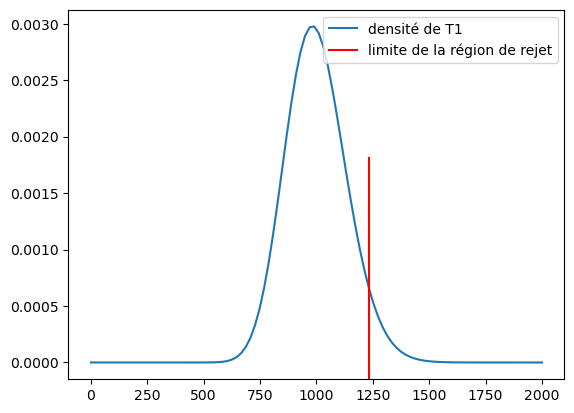

In [15]:
y=np.linspace(0,2000,100)
plt.plot(y,stats.gamma.pdf(y,55,loc=0,scale=1/(55*0.001)),label='densité de T1')
k1=k_alpha/len(df_cost)
plt.axvline(x=k1,ymin=0,ymax=0.6,color='red', label='limite de la région de rejet')
plt.legend()
print("La limite de la région de rejet vaut %f." % k1)

## 5

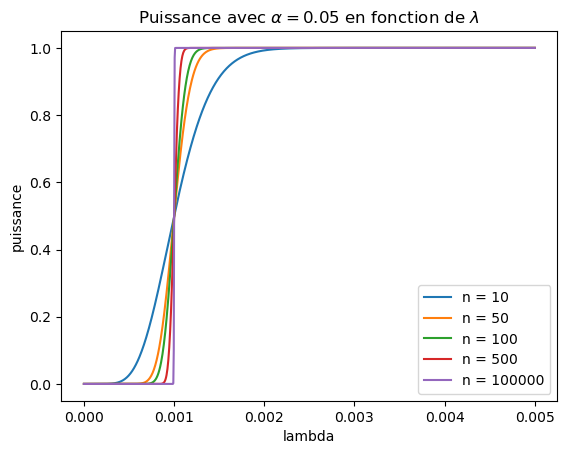

In [32]:
n_list = [10, 50, 100, 500, 100000]
l0 = 0.001
a = 0.5
l = np.linspace(10**(-9), 5*l0, 1000)

for n in n_list:
    f = stats.gamma.cdf(x=stats.gamma.ppf(q=a, a=n, scale=1/l0), a=n, scale=1/l)
    plt.plot(l, f)

plt.title(r"Puissance avec $\alpha = 0.05$ en fonction de $\lambda$")
plt.legend([f"n = {n}" for n in n_list])
plt.xlabel("lambda")
plt.ylabel("puissance")
plt.show()

Plus le nombre d'échantillons est grand, plus la variation de puissance en fonction de $\lambda$ est grande autour de $\lambda_{0}$. La probabilité de rejeter $𝐻_0$ croît avec n.

## 6

Selon le théorème centrale limite, pour un nombre d'échantillons suffisamment grand, la distribution de $Y$ peut être approximée à une distribution normale avec moyenne une $\mu = \mathbb{E}\left[Y\right]$ et une variance $\sigma^2 = Var\left(Y\right)$. Puisque $Y \sim Gamma\left(n, \frac{1}{\lambda}\right)$, nous avons $\mathbb{E}\left[Y\right] = \frac{1}{\lambda}$ et $Var\left(Y\right) = \frac{n}{\lambda^2}$ donc $ Y \sim \mathcal{N}\left(\frac{1}{\lambda}, \ \frac{n}{\lambda^2}\right)$

Reprenons alors la question initiale, le coût moyen d'un accident est inférieur à 1 milliard de dollars. En considérant la distribution normale, nous acceptons toujours l'hypothèse $H_0$ puisque la p-valeur ($p \approx 0.979$) obtenue est superieur à $1-\alpha = 0.95$. Ainsi, nous obtenons de nouveau que le coût moyen d'un accident est inférieur à un milliard de dollars.

In [24]:
l0 = 0.001
m = len(df_cost)/l0
v = len(df_cost)/l0**2
p = stats.norm.sf(x=np.sum(df_cost), loc=m, scale=np.sqrt(v))
print("La p-valeur vaut %f." % p)

La p-valeur vaut 0.978799.
